# Spain Wage Structure Survey

The data presented here has been retrieved from the periodical INE survey about Spain's population wage structure:
https://www.ine.es/dyngs/INEbase/en/operacion.htm?c=Estadistica_C&cid=1254736177025&menu=ultiDatos&idp=1254735976596

Information about each variable can be found in the dr_EES_2014.xlsx file.


In [1]:
salary <- read.csv("Data/salario.csv")
head(salary)
dim(salary)

,ORDENCCC,ORDENTRA,NUTS1,CNACE,ESTRATO2,CONTROL,MERCADO,REGULACION,SEXO,TIPOPAIS,⋯,DSIESPA2,SIESPA3,DSIESPA3,SIESPA4,DSIESPA4,SALBRUTO,GEXTRA,VESP,ANOS2,FACTOTAL
,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,15000007,1,1,C1,3,Privado,2,3,Hombre,1,⋯,0,6,0,6,0,116002.04,38627.76,393.52,3,1.00
2,15000007,2,1,C1,3,Privado,2,3,Hombre,1,⋯,0,6,0,6,0,50156.66,11968.66,196.76,3,15.68
3,15000007,3,1,C1,3,Privado,2,3,Hombre,1,⋯,0,6,0,6,0,37970.71,6649.79,98.38,4,15.68
4,15000007,4,1,C1,3,Privado,2,3,Hombre,1,⋯,0,6,0,6,0,62000.00,24285.70,0.00,4,15.68
5,15000007,5,1,C1,3,Privado,2,3,Hombre,1,⋯,0,6,0,6,0,60425.00,15833.24,0.00,3,15.68
6,15000007,6,1,C1,3,Privado,2,3,Hombre,1,⋯,13,6,0,6,0,38200.00,8461.13,0.00,2,15.68


[1] 209436     54

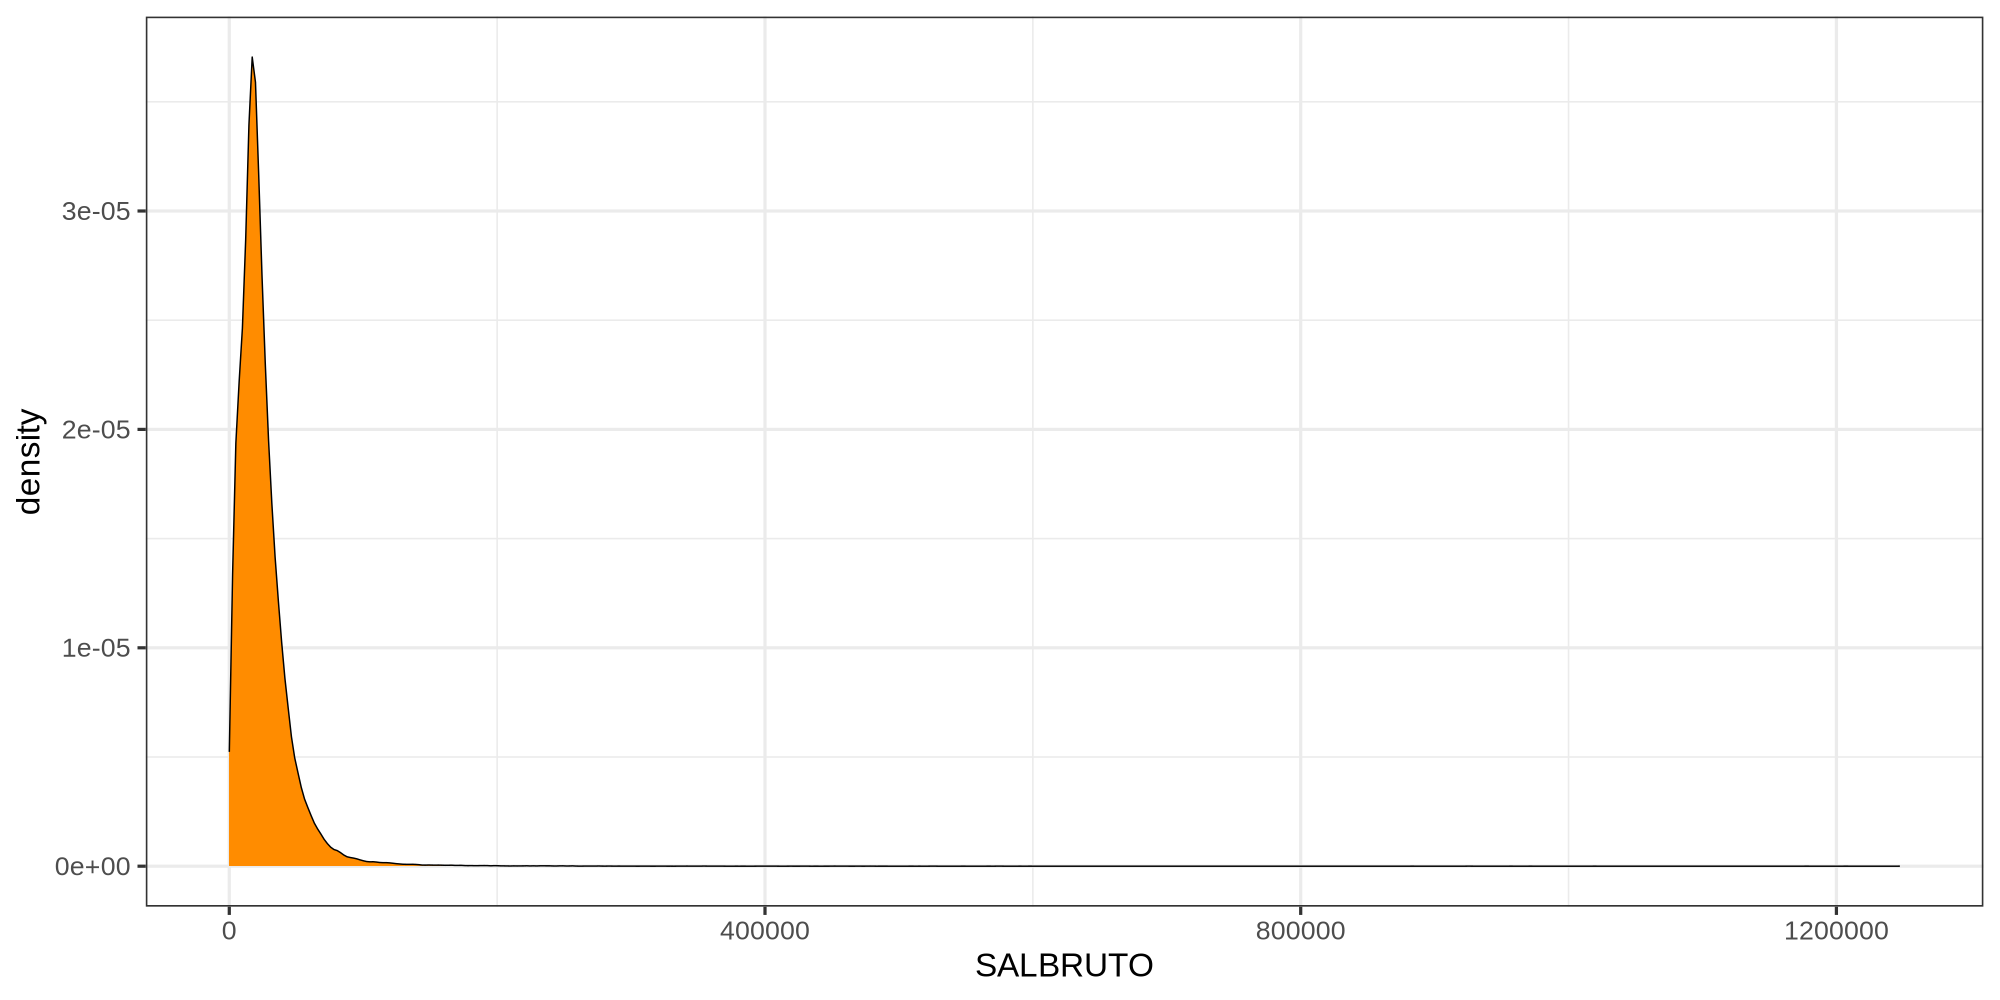

In [2]:
library(ggplot2)

# default plots size
options(repr.plot.width = 20, repr.plot.height = 10, repr.plot.res = 100)

# default theme and font size
theme_set(theme_bw(base_size = 24))



ggplot(salary, aes(x=SALBRUTO)) + geom_density(fill="darkorange", color="black")

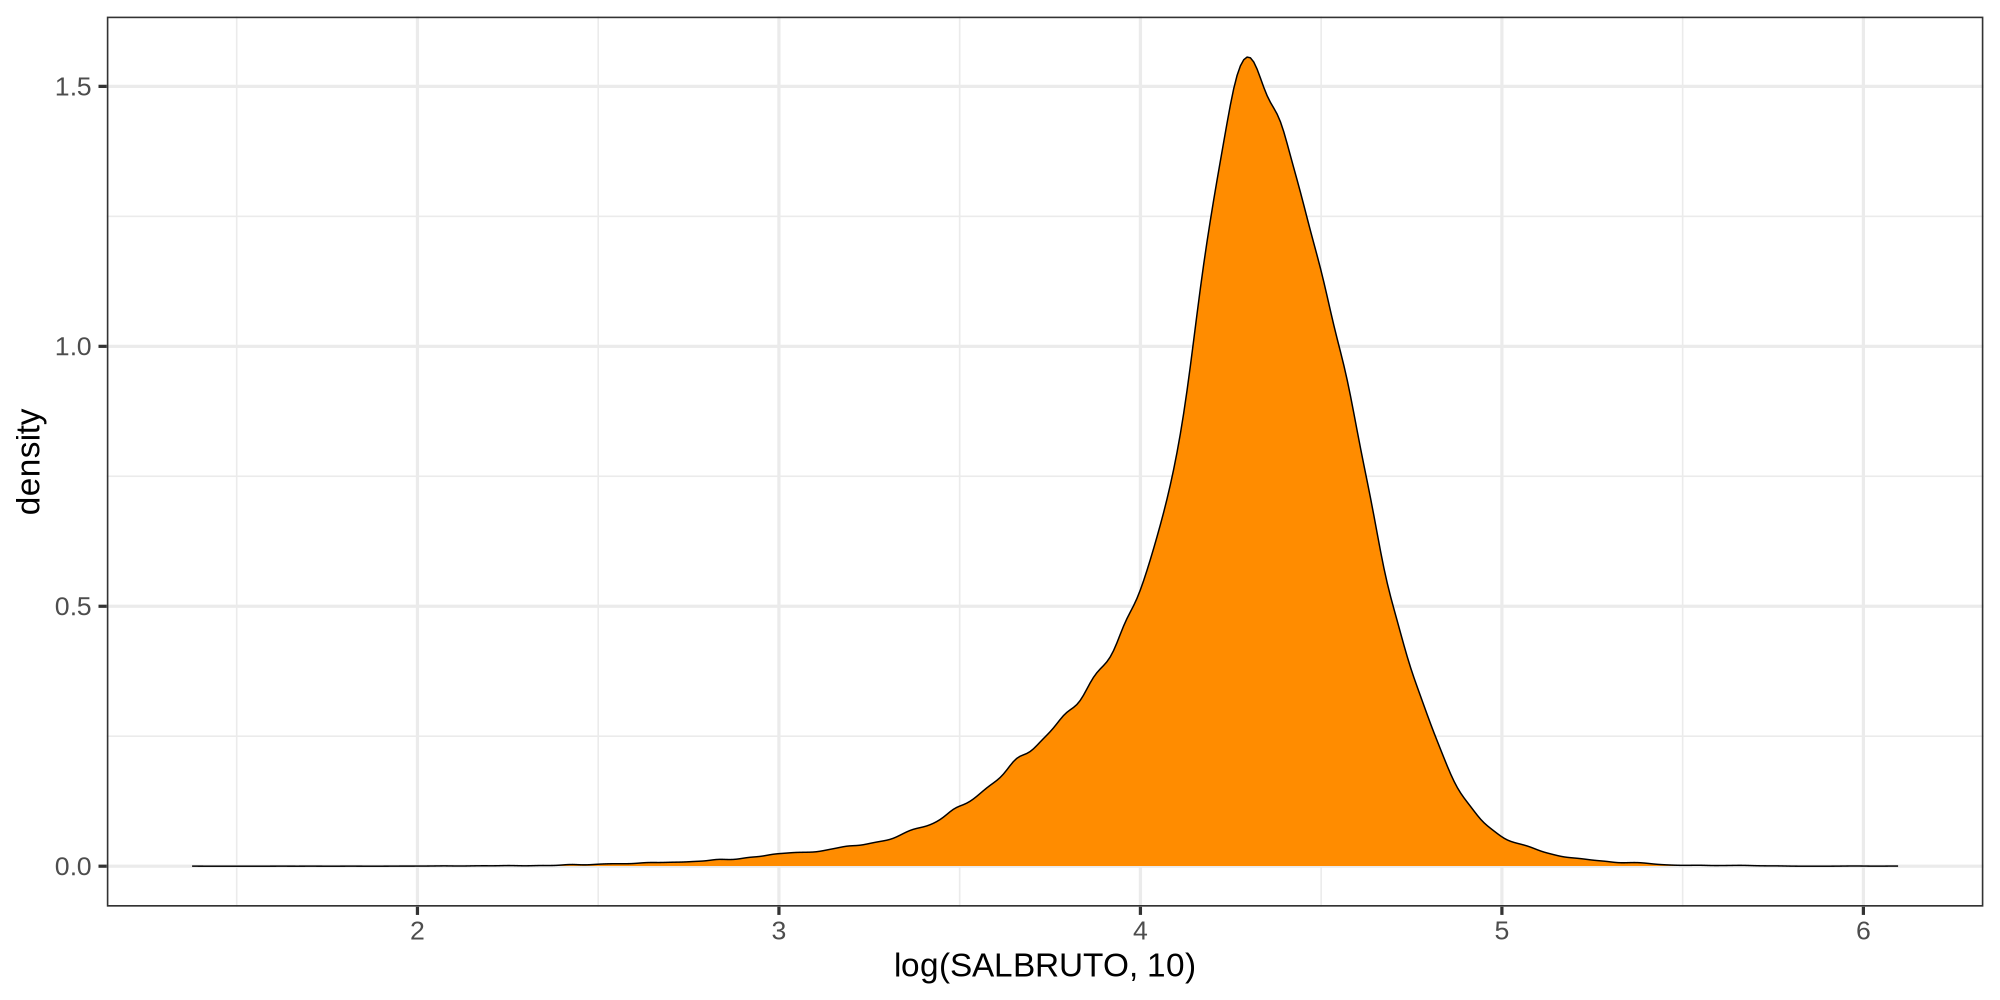

In [3]:
ggplot(salary, aes(x=log(SALBRUTO, 10))) + geom_density(fill="darkorange", color="black")

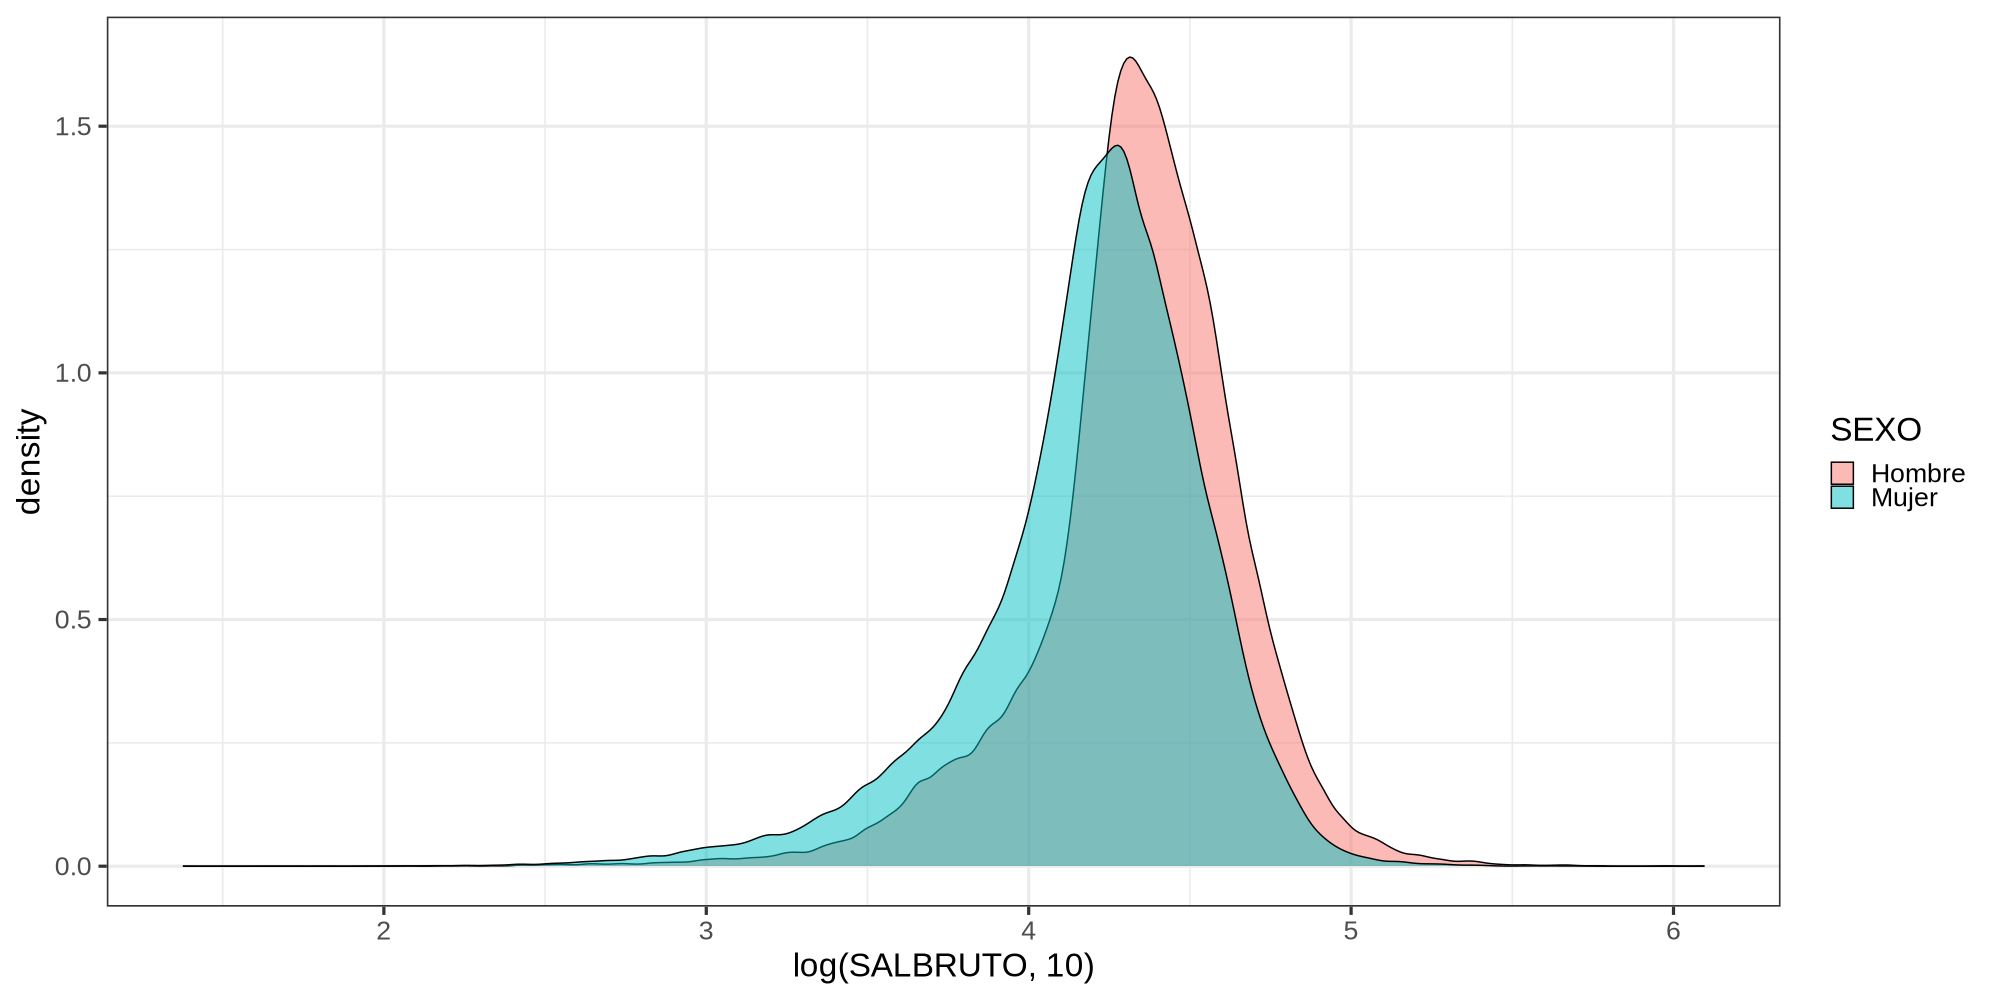

In [4]:
ggplot(salary, aes(x=log(SALBRUTO, 10))) + geom_density(aes(fill=SEXO),  color="black", alpha=0.5)

In [5]:
# How different are wages, on average? Remember aggregate?
aggregate(salary$SALBRUTO, by=list(salary$SEXO), mean)

Group.1,x
<chr>,<dbl>
Hombre,27955.46
Mujer,20530.37


In [6]:
# A0	DIRECTORES Y GERENTES
# B0	TÉCNICOS Y PROFESIONALES CIENTÍFICOS E INTELECTUALES DE LA SALUD Y LA ENSEÑANZA
# C0	OTROS TÉCNICOS Y PROFESIONALES CIENTÍFICOS E INTELECTUALES
# D0	TÉCNICOS; PROFESIONALES DE APOYO
# E0	EMPLEADOS DE OFICINA QUE NO ATIENDEN AL PÚBLICO
# F0	EMPLEADOS DE OFICINA QUE ATIENDEN AL PÚBLICO
# G0	TRABAJADORES DE LOS SERVICIOS DE RESTAURACION Y COMERCIO
# H0	TRABAJADORES DE LOS SERVICIOS DE SALUD Y EL CUIDADO DE PERSONAS
# I0	TRABAJADORES DE LOS SERVICOS DE PROTECCION Y SEGURIDAD
# J0	TRABAJADORES CUALIFICADOS EN EL SECTOR AGRÍCOLA, GANADERO, FORESTAL Y PESQUERO
# K0	TRABAJADORES CUALIFICADOS DE LA CONSTRUCCION, EXCEPTO LOS OPERADORES DE MÁQUINAS
# L0	TRABAJADORES CUALIFICADOS DE LAS INDUSTRIAS MANUFACTURERAS, EXCEPTO OPERADORES DE INSTALACIONES Y MÁQUINAS
# M0	OPERADORES DE INSTALACIONES Y MAQUINARIA FIJAS, Y MONTADORES
# N0	CONDUCTORES Y OPERADORES DE MAQUINARIA MOVIL
# O0	TRABAJADORES NO CUALIFICADOS EN SERVICIOS
# P0	PEONES DE LA AGRICULTURA, PESCA, CONSTRUCCIÓN, INDUSTRIAS MANUFACTURERAS Y TRANSPORTES
# Q0	OCUPACIONES MILITARES

# How different are wages by position?
aggregate(salary$SALBRUTO, by=list(salary$CNO1), mean)

Group.1,x
<chr>,<dbl>
A0,65335.14
B0,28935.07
C0,37657.04
D0,29646.58
E0,21233.42
F0,17748.21
G0,14422.91
H0,14482.41
I0,21239.06


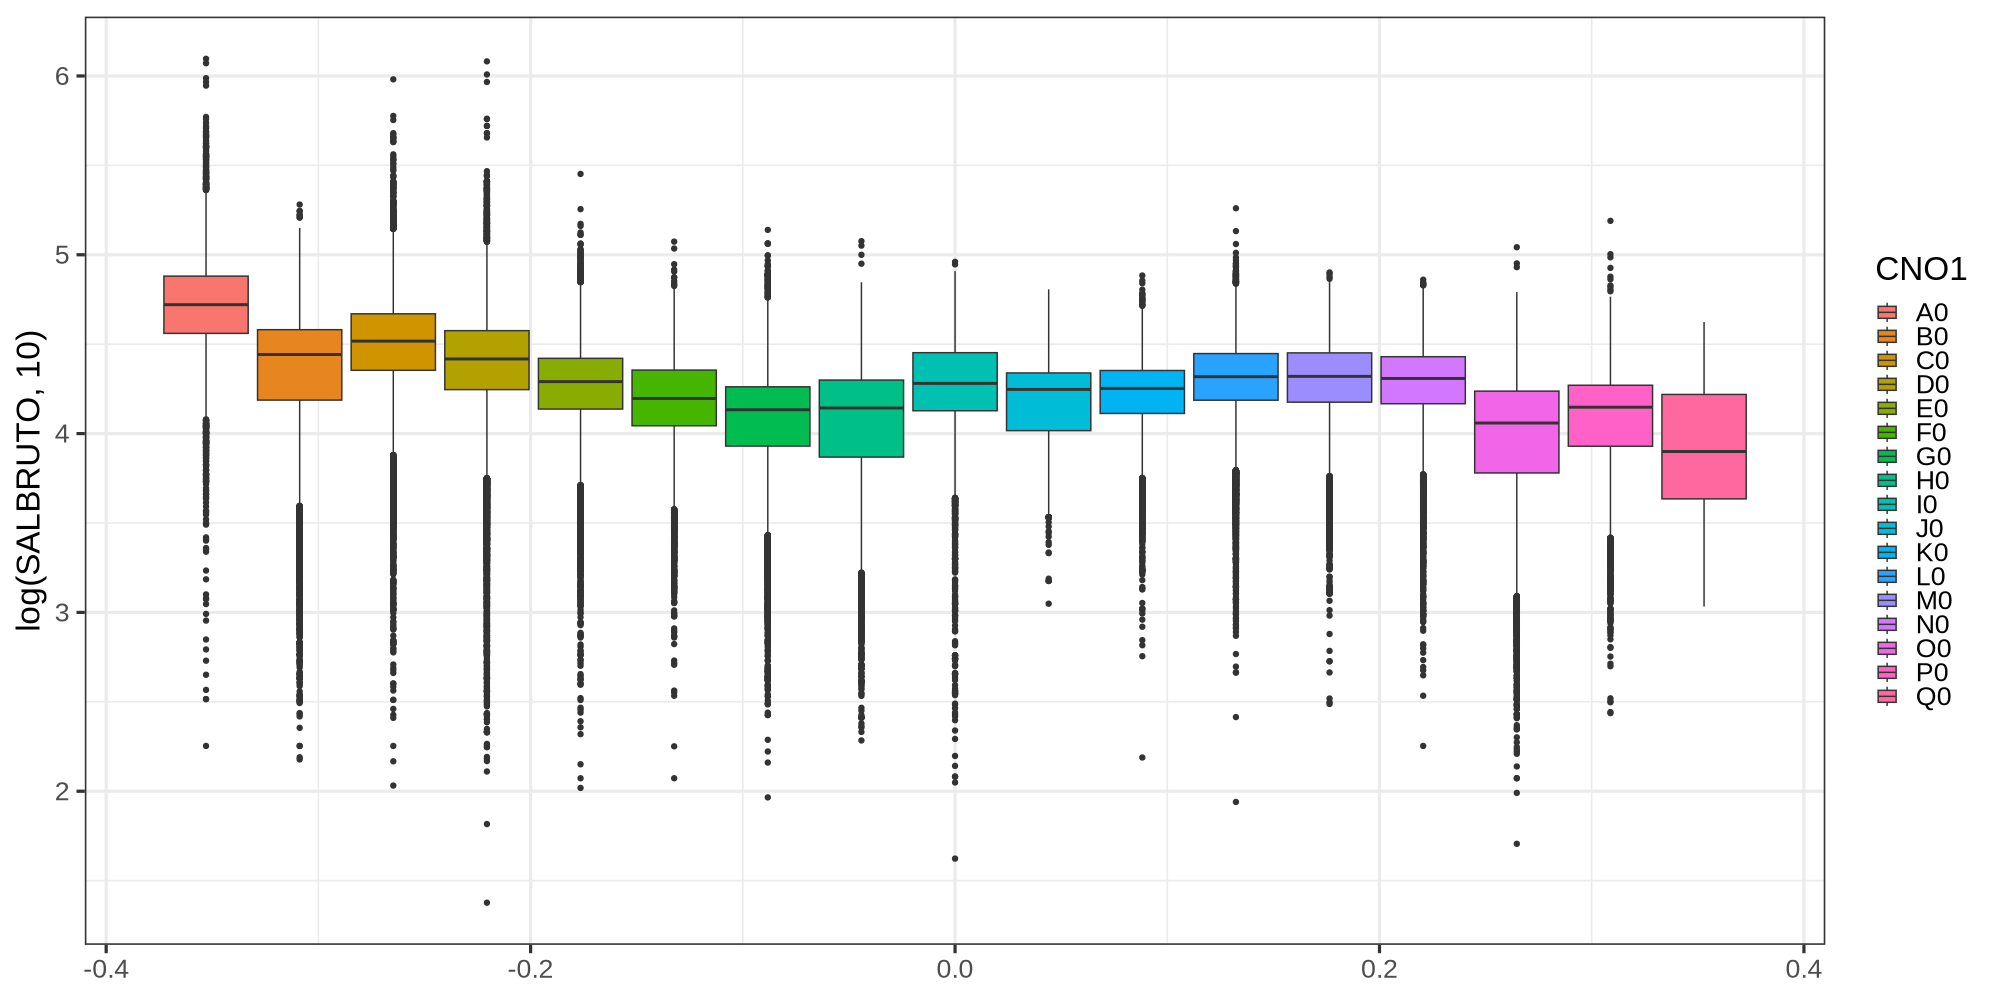

In [7]:
# Boxplots by positions
ggplot(salary, aes(y=log(SALBRUTO, 10))) + geom_boxplot(aes(fill=CNO1))

In [89]:
library("plotrix") # Permite calcular el error estándar.

# Let's compare wages between sexes depending on position

means <- aggregate((salary$SALBRUTO), by=list(salary$SEXO, salary$CNO1), mean)
std_err <- aggregate((salary$SALBRUTO), by=list(salary$SEXO, salary$CNO1), std.error)

head(means)
head(std_err)

sex_positions <- data.frame(SEXO=means$`Group.1`, Position=means$`Group.2`,   mean=means$x, std_err=std_err$x)
sex_positions

,Group.1,Group.2,x
,<chr>,<chr>,<dbl>
1,Hombre,A0,71980.64
2,Mujer,A0,51693.29
3,Hombre,B0,32607.31
4,Mujer,B0,27261.58
5,Hombre,C0,42061.81
6,Mujer,C0,31928.78


,Group.1,Group.2,x
,<chr>,<chr>,<dbl>
1,Hombre,A0,922.1405
2,Mujer,A0,814.8941
3,Hombre,B0,358.6189
4,Mujer,B0,173.4867
5,Hombre,C0,267.0564
6,Mujer,C0,187.5495


SEXO,Position,mean,std_err
<chr>,<chr>,<dbl>,<dbl>
Hombre,A0,71980.644,922.14046
Mujer,A0,51693.289,814.89409
Hombre,B0,32607.314,358.61894
Mujer,B0,27261.582,173.48666
Hombre,C0,42061.807,267.05635
Mujer,C0,31928.778,187.54953
Hombre,D0,33051.606,170.73863
Mujer,D0,24634.724,135.78622
Hombre,E0,24520.196,162.29542


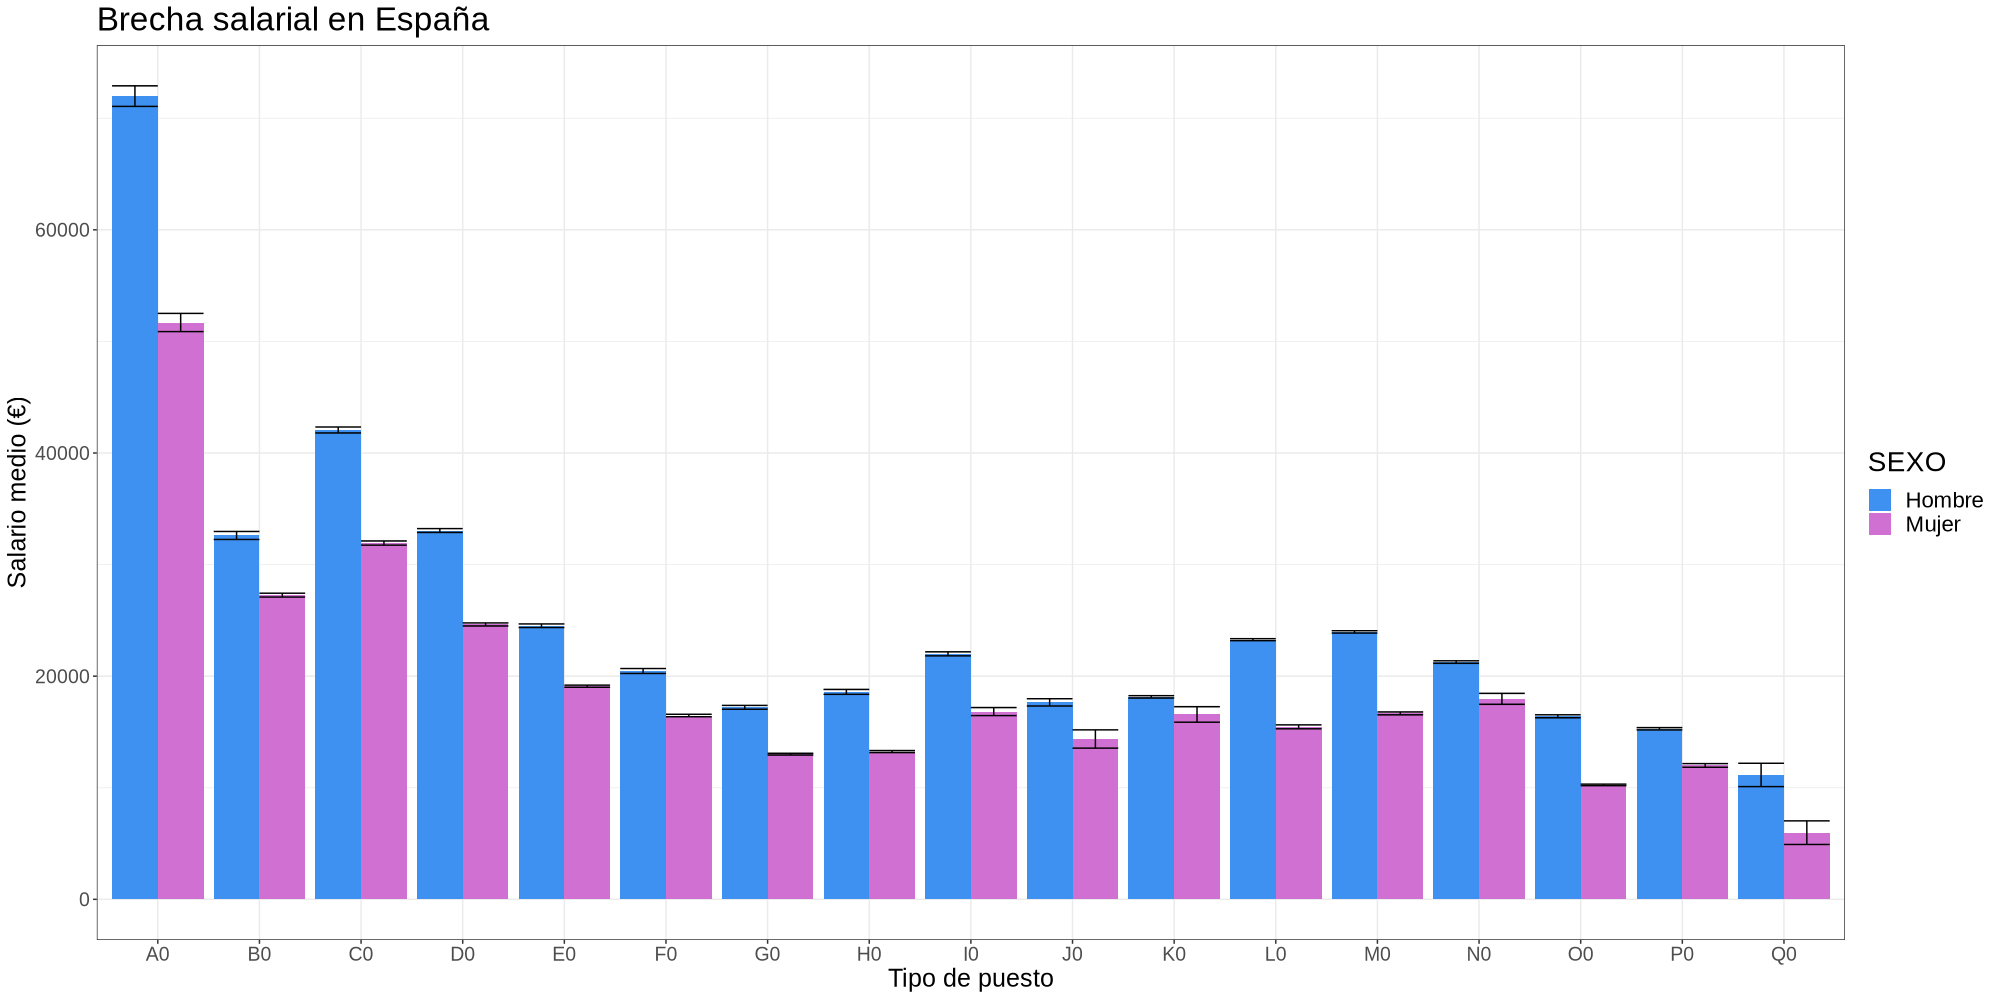

In [82]:
# Boxplots by positions

options(scipen = 999) # Evita que se use notación científica en los ejes.

ggplot(sex_positions, aes(x = Position, y = mean))  +

geom_bar(stat = "identity", aes(fill = SEXO), position = 'dodge') + # Gráfico de barras. Stat permite que en el eje x se use para identificar grupos, fill hace que los colores se determinen por un grupo dado y position = 'dodge' que salga una barra al lado de otra.

geom_errorbar(aes(ymin = mean-std_err, ymax = mean+std_err, group = SEXO), position = 'dodge') + # Se usa el std error que hemos calculado. x_max e y_min es el valor +/- error. Group permiet que se asocie a un grupo dado y position que salga en su misma posición.

labs(title = "Brecha salarial en España", x = 'Tipo de puesto', y = "Salario medio (€)")+  # Cambiamos los títulos.

theme_bw() + # Usamos el tema blanco y negro. # theme_set(theme_bw(base_size = 24)) Para facilitar la gestión de las fuentes.

theme(axis.text = element_text(size = 14), axis.title = element_text(size = 18), title = element_text(size = 20), legend.text = element_text(size = 16)) + # Cambiamos el tamaño de los textos.

scale_fill_manual(values=c('#3e91f0','#d070d3')) # Cambiamos la combinación de colores.

## Facets

Facets allow you to create multiple plot based on factors.

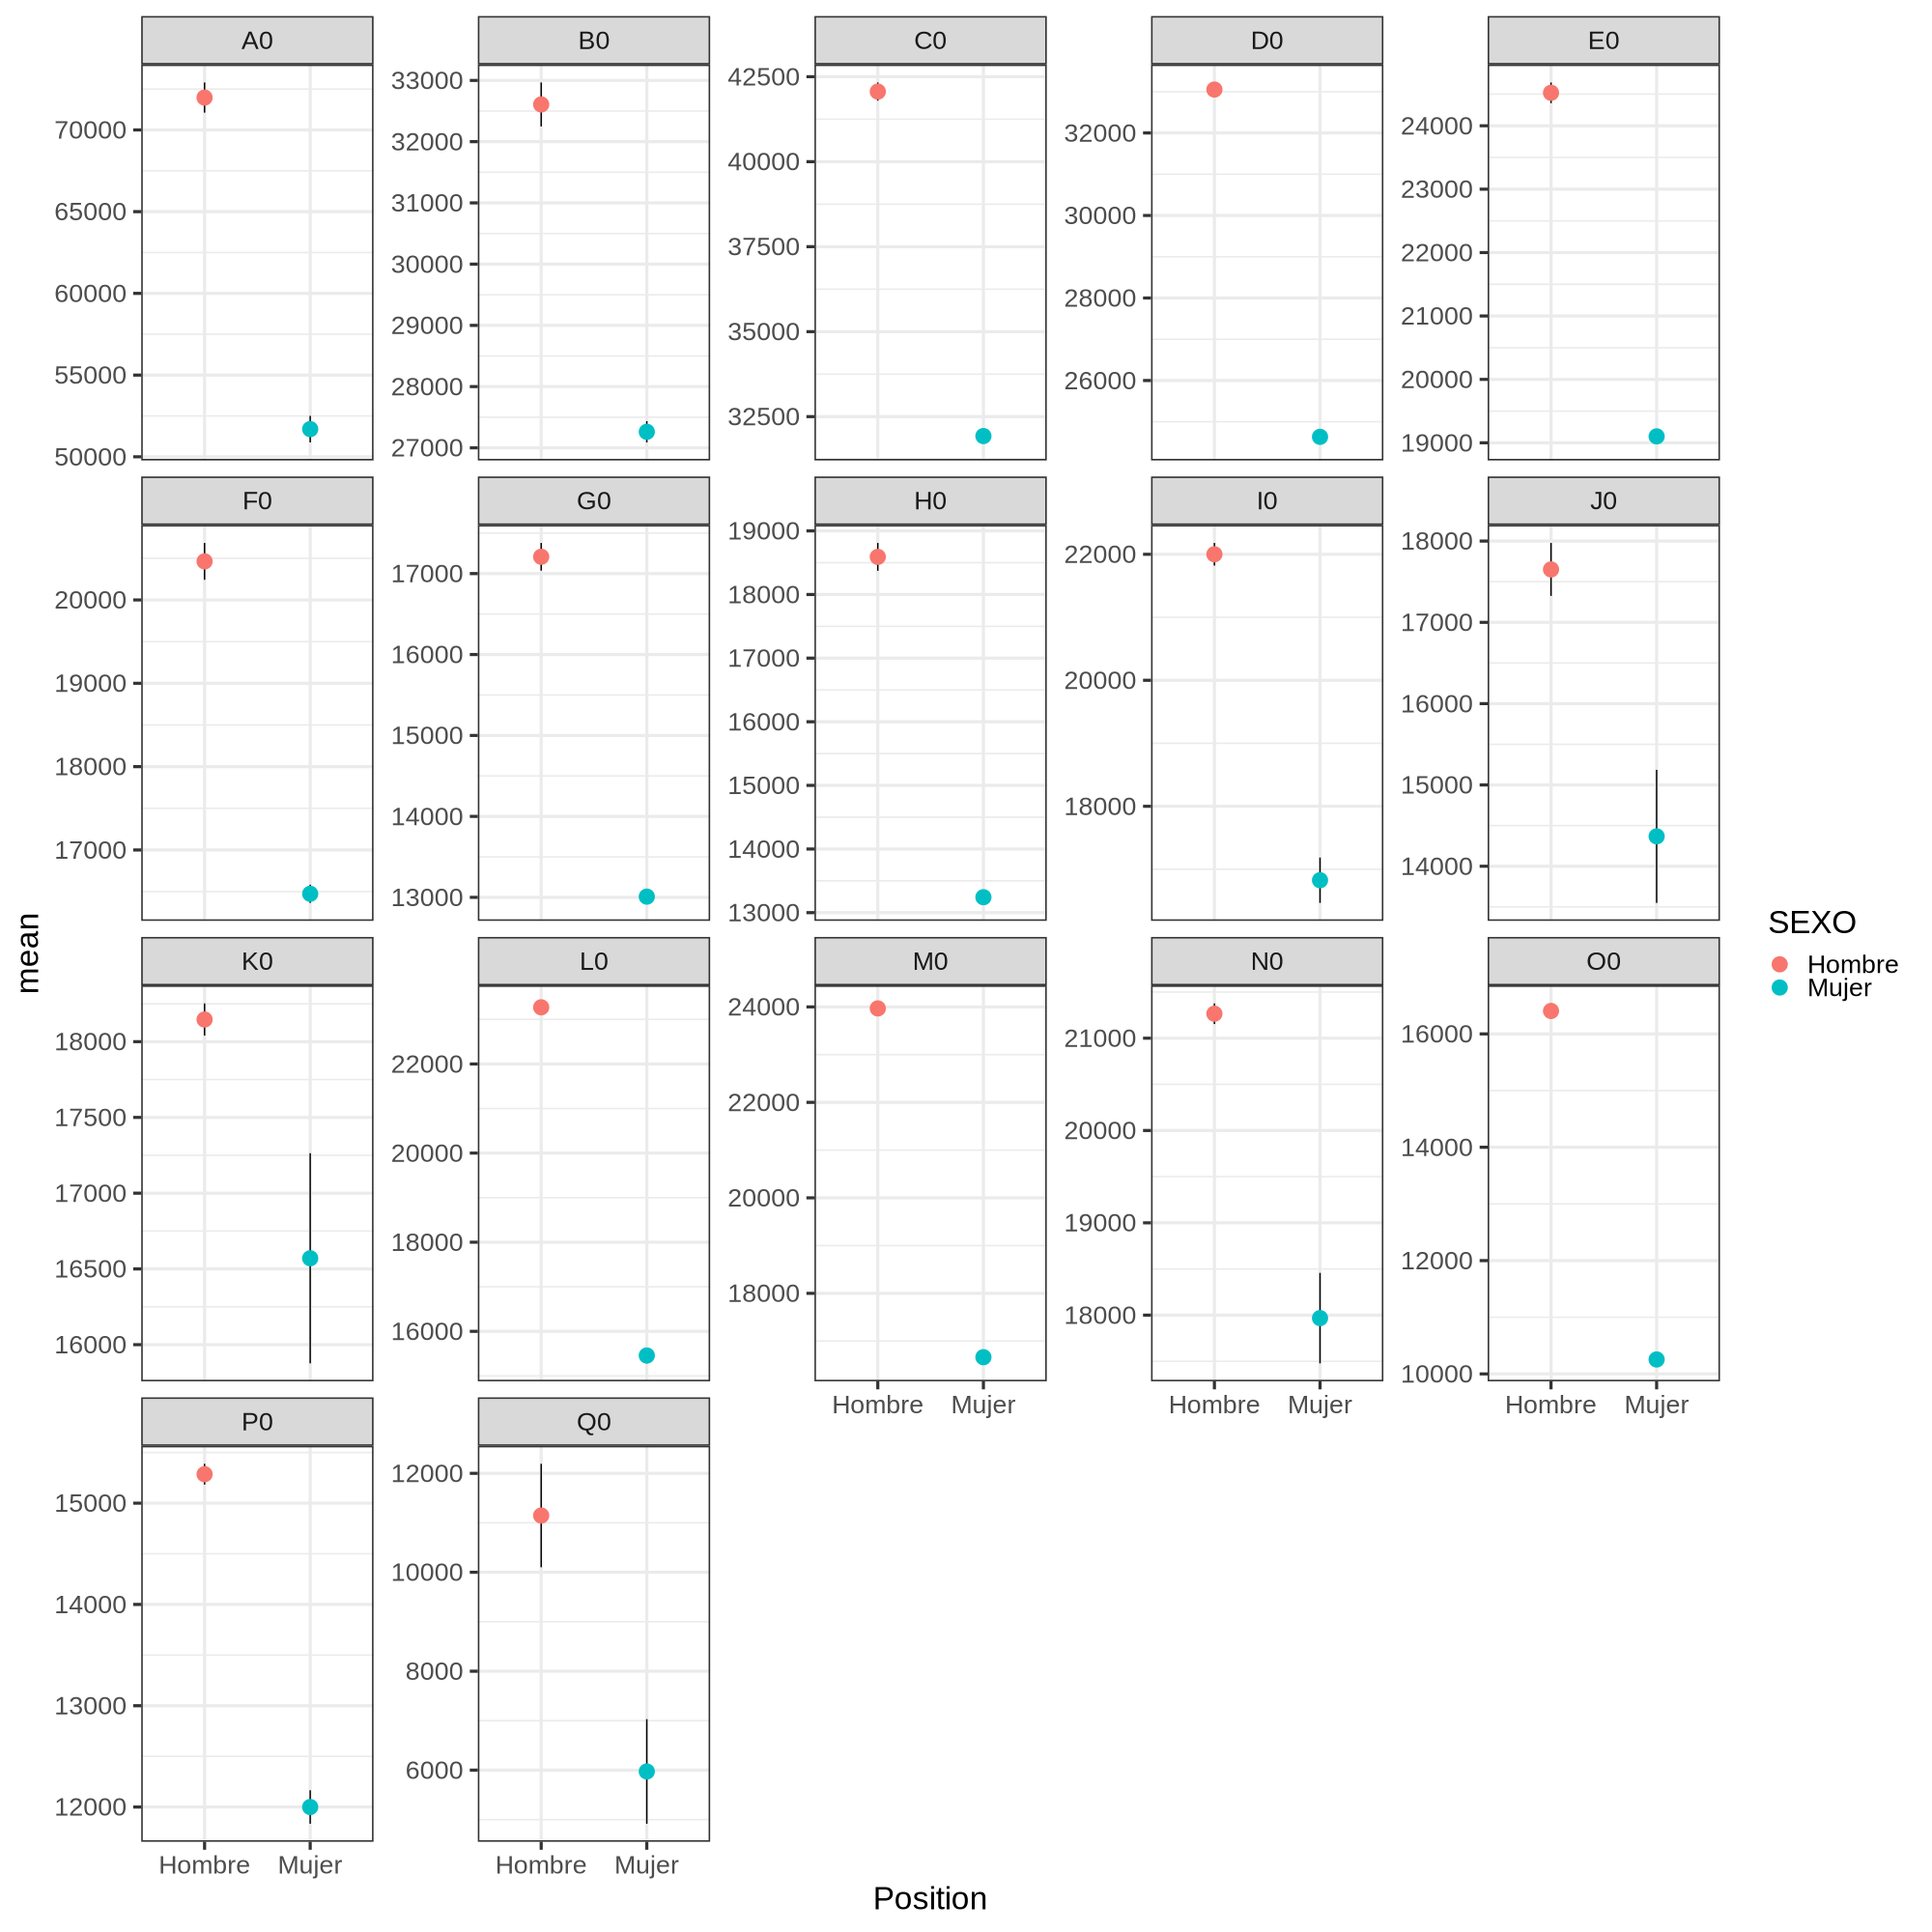

In [92]:
library("plotrix") # Permite calcular el error estándar.

# Let's compare wages between sexes depending on position

means <- aggregate((salary$SALBRUTO), by=list(salary$SEXO, salary$CNO1), mean)
std_err <- aggregate((salary$SALBRUTO), by=list(salary$SEXO, salary$CNO1), std.error)

sex_positions <- data.frame(SEXO=means$`Group.1`, Position=means$`Group.2`,   mean=means$x, std_err=std_err$x)

options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

#ggplot(sex_positions, aes(x=Position, y=mean)) + geom_point(aes(color=SEXO), size=5)
#ggplot(sex_positions, aes(x=Position, y=mean)) + geom_point(aes(x=SEXO, color=SEXO), size=5) + facet_wrap(Position~.)
ggplot(sex_positions, aes(x=Position, y=mean)) +
    geom_errorbar(aes(x=SEXO, ymin=mean-std_err, ymax=mean+std_err), width=0) + # OJO, TIENES QUE INDICAR TU EJE x.
    geom_point(aes(x=SEXO, color=SEXO), size=5) +
    facet_wrap(vars(Position), scales = "free_y") # También se puede empelar vars() con esta sintaxis: Positions ~ . Scales: Determina si se libera la escala de un eje determinado.

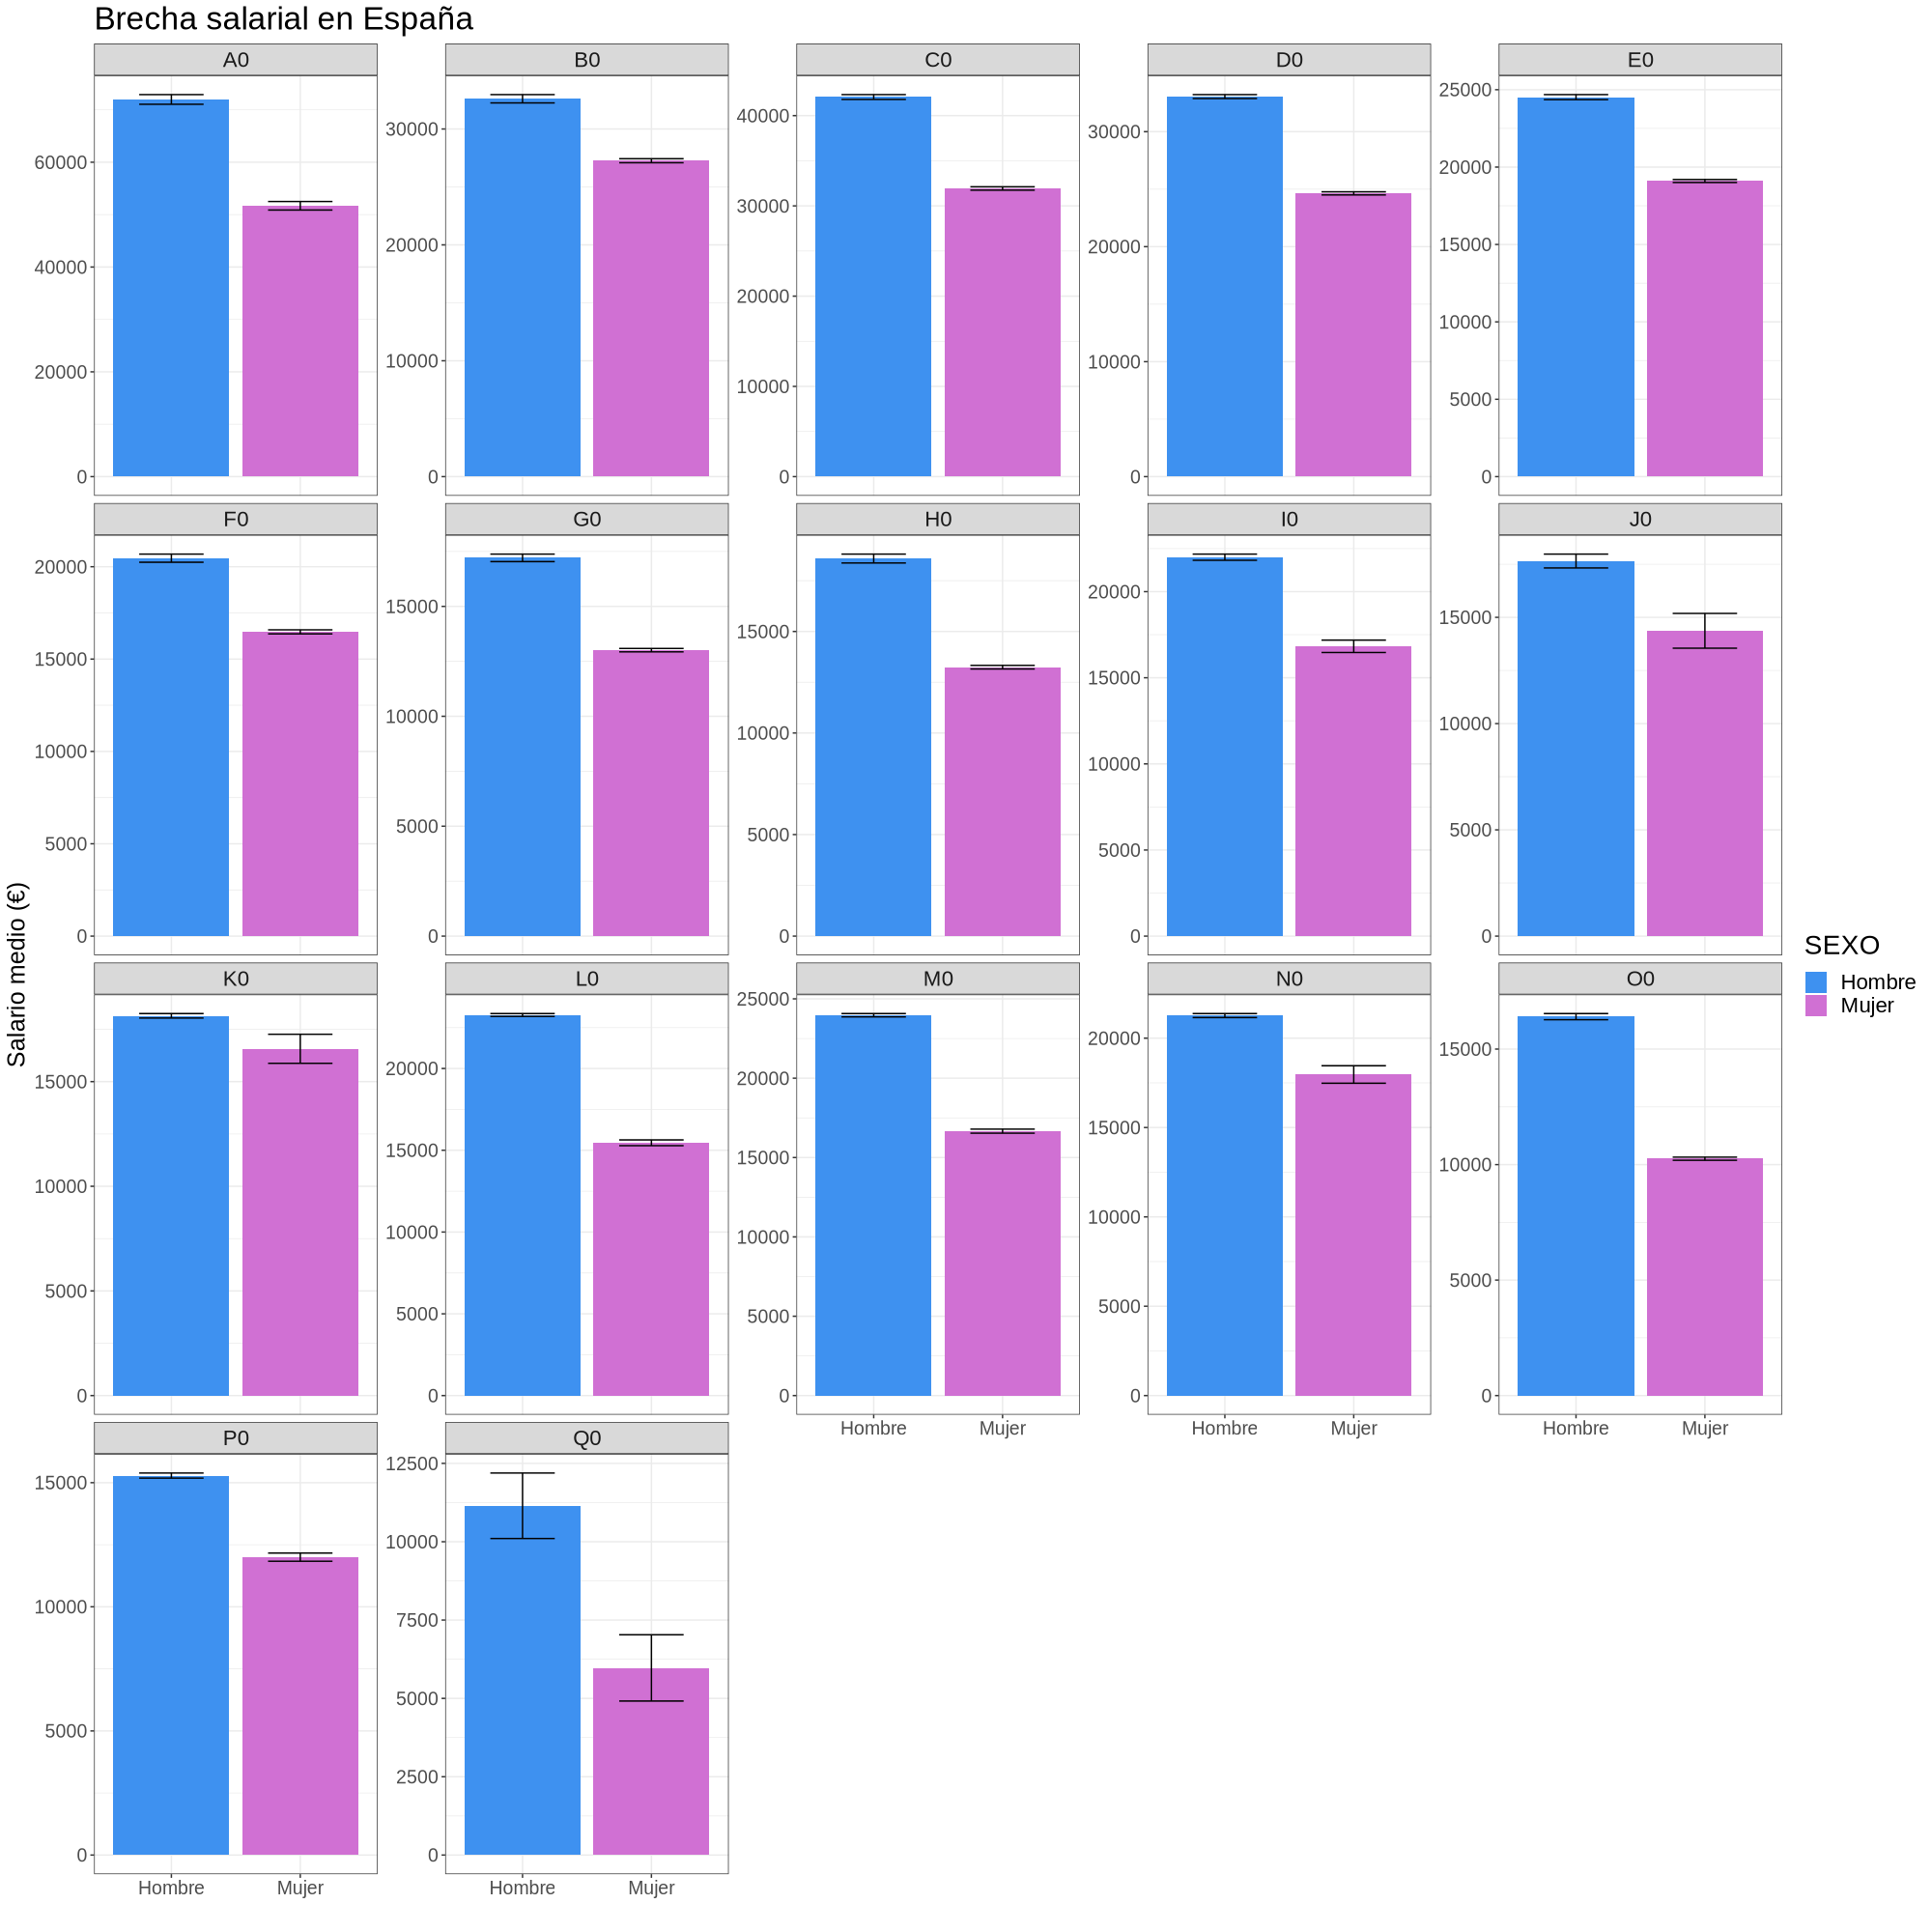

In [109]:
options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

options(scipen = 999) # Evita que se use notación científica en los ejes.

ggplot(sex_positions, aes(x = SEXO, y = mean))  +

geom_bar(aes(x = SEXO, fill = SEXO), stat = "identity", position = 'dodge') + # Gráfico de barras. Stat permite que en el eje x se use para identificar grupos, fill hace que los colores se determinen por un grupo dado y position = 'dodge' que salga una barra al lado de otra.

geom_errorbar(aes(x = SEXO, ymin = mean-std_err, ymax = mean+std_err, group = SEXO), position = 'dodge', width = 0.5) + # Se usa el std error que hemos calculado. x_max e y_min es el valor +/- error. Group permiet que se asocie a un grupo dado y position que salga en su misma posición.

labs(title = "Brecha salarial en España", x = "", y = "Salario medio (€)")+  # Cambiamos los títulos.

theme_bw() + # Usamos el tema blanco y negro.

theme(axis.text = element_text(size = 14), axis.title = element_text(size = 18), title = element_text(size = 20), legend.text = element_text(size = 16),  # Cambiamos el tamaño de los textos.
strip.text = element_text(size = 16)) + # PARA EL TÍTULO DE LOS MINIGŔAFICOS.

scale_fill_manual(values=c('#3e91f0','#d070d3')) + # Cambiamos la combinación de colores.

facet_wrap(vars(Position), scales = "free_y")



## grid.arrange and cheating with data

In previous classes we saw that you can use the par() function to arrange several different plot on the same page. With ggplot you need to use gridArrange, from the gridExtra package.

,SEXO,ESTU,mean,sd
,<chr>,<int>,<dbl>,<dbl>
1,Hombre,1,9.552035,0.7206533
2,Mujer,1,9.019467,0.8484114
3,Hombre,2,9.678520,0.6815540
4,Mujer,2,9.152834,0.8317309
5,Hombre,3,9.767660,0.6636415
6,Mujer,3,9.335045,0.7945205


,SEXO,ESTU,mean,sd
,<chr>,<int>,<dbl>,<dbl>
1,Hombre,1,17099.37,9449.349
2,Mujer,1,10797.76,6853.122
3,Hombre,2,19203.29,13452.828
4,Mujer,2,12233.22,7878.033
5,Hombre,3,20846.43,13359.753
6,Mujer,3,14470.33,10142.153


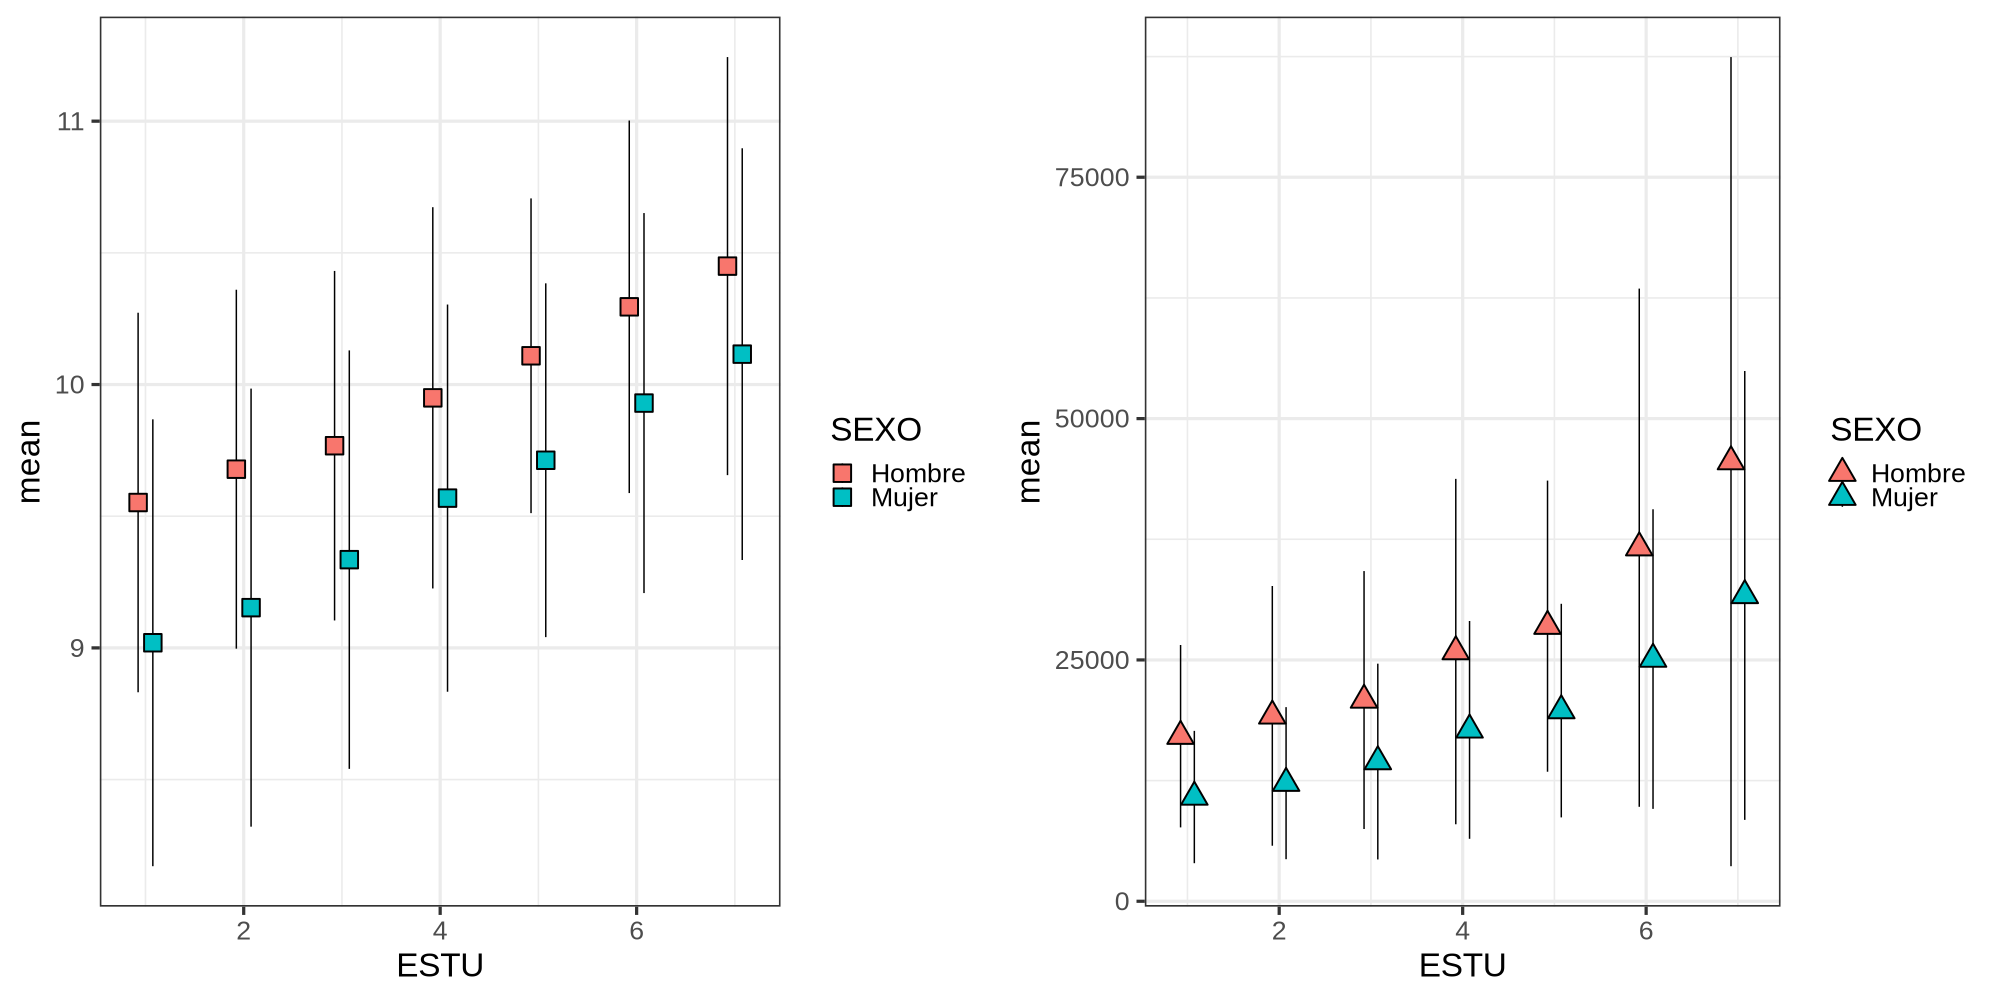

In [119]:
library(ggplot2)
library(gridExtra)
library(plotrix)

# default plots size
options(repr.plot.width = 20, repr.plot.height = 10, repr.plot.res = 100)

# default theme and font size
theme_set(theme_bw(base_size = 24)) # Se establece un tamaño de fuente de referencia y apartir de ahí se modifican el resto de fuentes.

# Let's compare wages between sexes depending on studies (with the LOG salary)
mean <- aggregate(log(salary$SALBRUTO), by=list(salary$SEXO, salary$ESTU), mean)
sd <- aggregate(log(salary$SALBRUTO), by=list(salary$SEXO, salary$ESTU), sd)
sex_estu_log <- data.frame(SEXO=mean$`Group.1`, ESTU=mean$`Group.2`,   mean=mean$x, sd=sd$x)
head(sex_estu_log)

# Let's compare wages between sexes depending on studies (with the NATURAL salary)
mean <- aggregate(salary$SALBRUTO, by=list(salary$SEXO, salary$ESTU), mean)
sd <- aggregate(salary$SALBRUTO, by=list(salary$SEXO, salary$ESTU), sd)
sex_estu_nat <- data.frame(SEXO=mean$`Group.1`, ESTU=mean$`Group.2`,   mean=mean$x, sd=sd$x)
head(sex_estu_nat)


# geom_pointragne allows you to put dots and bars at the same time (for more shapes: http://www.sthda.com/english/wiki/ggplot2-point-shapes)
p1 <- ggplot(sex_estu_log) + geom_pointrange(aes(x=ESTU, y=mean, ymin=mean-sd, ymax=mean+sd, fill=SEXO), size=1.5, shape=22, color="black", position = position_dodge(width=0.3)) # width avoids overplotting.
p2 <- ggplot(sex_estu_nat) + geom_pointrange(aes(x=ESTU, y=mean, ymin=mean-sd, ymax=mean+sd, fill=SEXO), size=1.5, shape=24, color="black", position = position_dodge(width=0.3))

# plot the two graph on the same page next to each other
grid.arrange(p1, p2, nrow=1)


It looks like we are getting two different results depending on whether the data has been log-transformed or not. In one case, studying decreases the gender pay gap and in the other it makes it worse! What do you think is happening? Which of the two plots is more correct? Are they both wrong? *hint: try to plot the histogram each data distributions (as in the first figures) against its own mean (as a vertical line), what do you observe?*

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Removed 1866 rows containing non-finite values (`stat_density()`).”


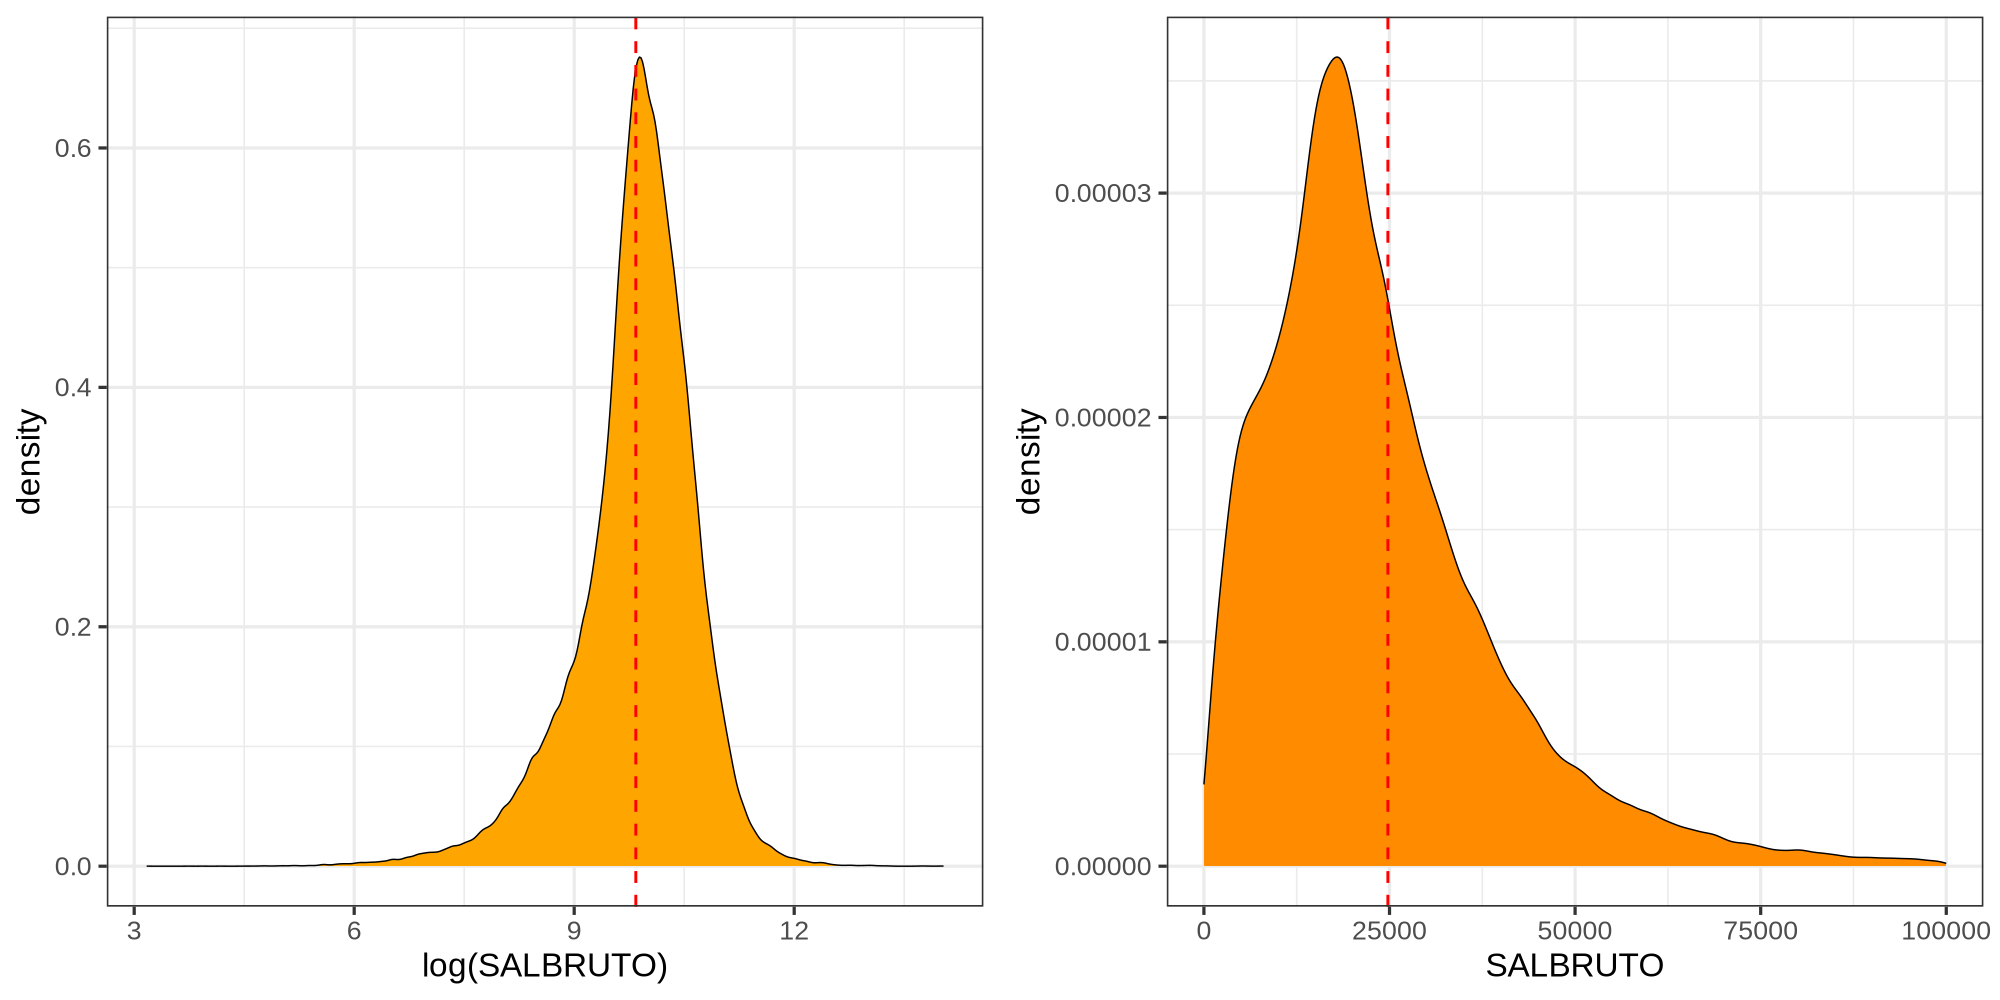

In [112]:

p3 <- ggplot(salary, aes(x=log(SALBRUTO))) + geom_density(fill="orange") +
    geom_vline(xintercept = mean(log(salary$SALBRUTO)), color="red", linetype="dashed", size=1)

p4 <- ggplot(salary, aes (x=SALBRUTO)) + geom_density(fill="darkorange") +
    geom_vline(xintercept = mean((salary$SALBRUTO)), color="red", linetype="dashed", size=1) +
    xlim(c(0, 100000))

grid.arrange(p3, p4, nrow=1)


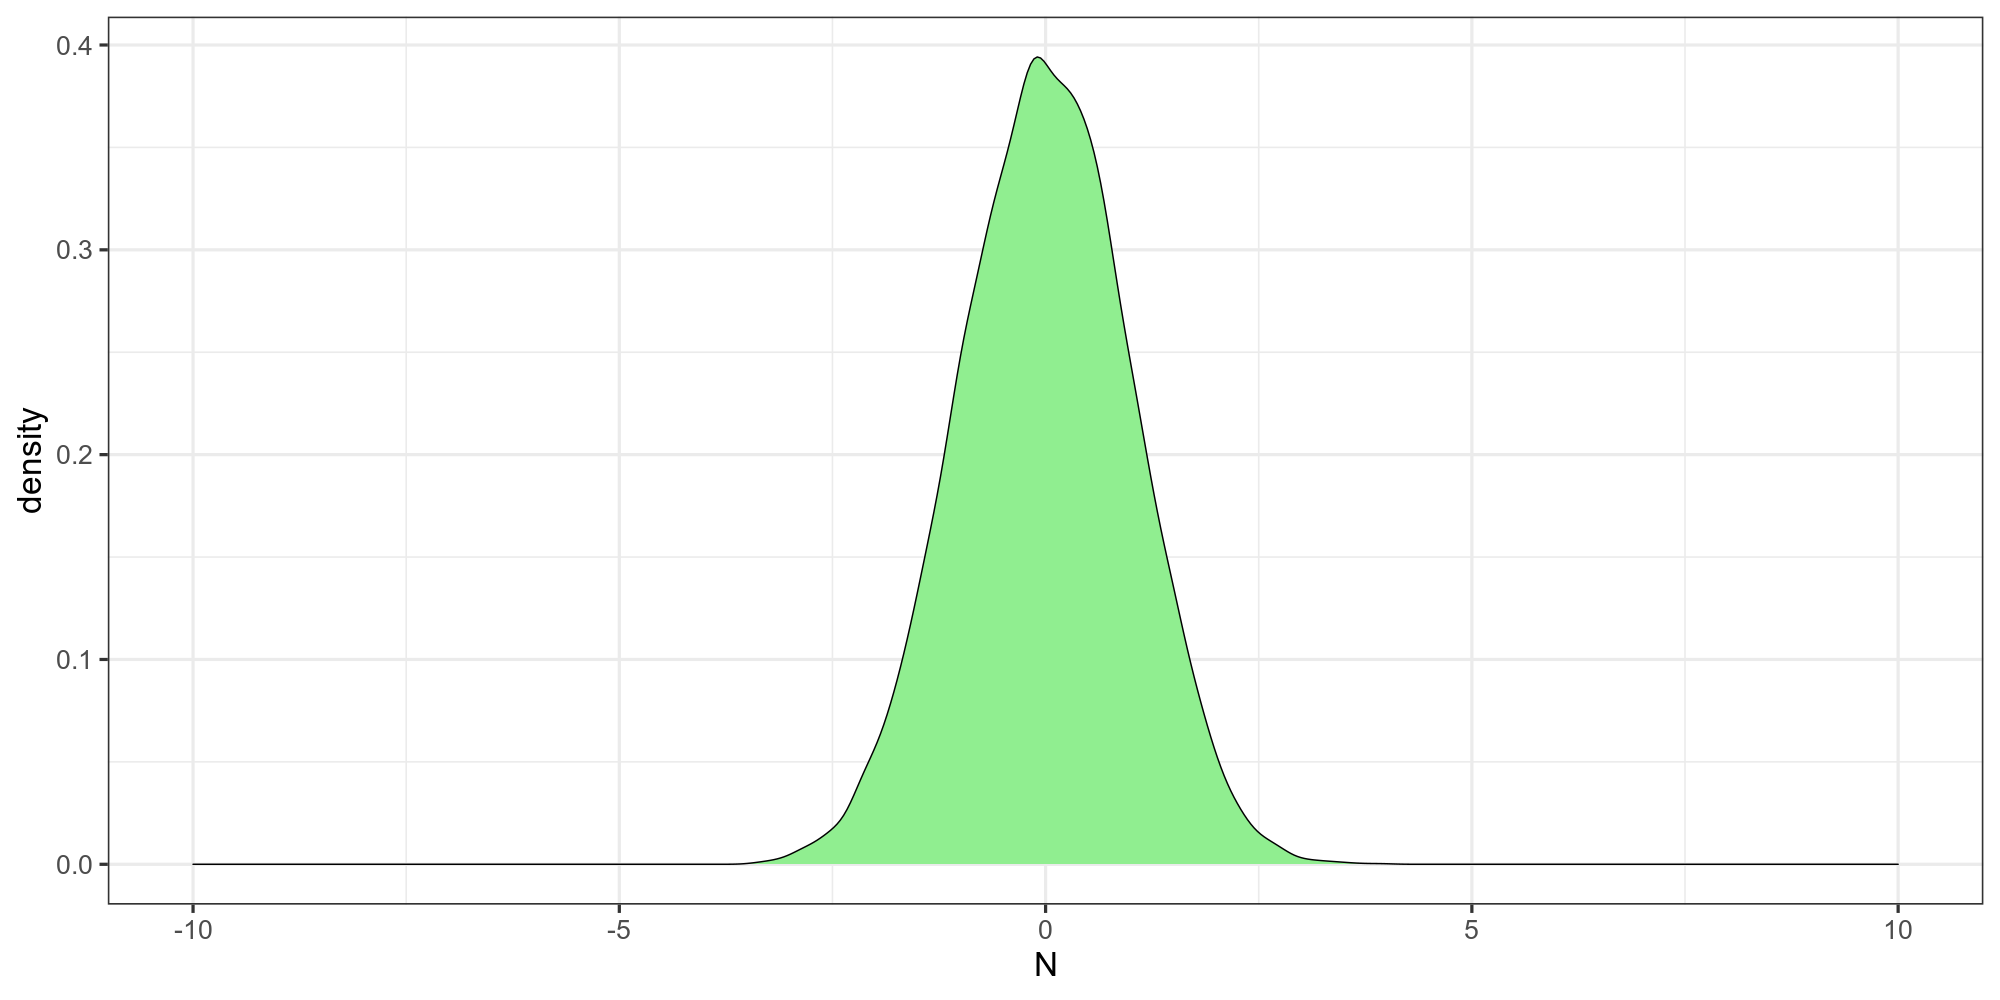

In [17]:
df <- data.frame(N = rnorm(10000, 0, 1)) # Crea una distribución normal con media 0 y sd 1.

ggplot(df, aes(x=N)) + geom_density(fill="lightgreen") + xlim(c(-10, 10))

Warning message:
“Removed 1866 rows containing non-finite values (stat_density).”
Warning message:
“Removed 139 rows containing non-finite values (stat_density).”


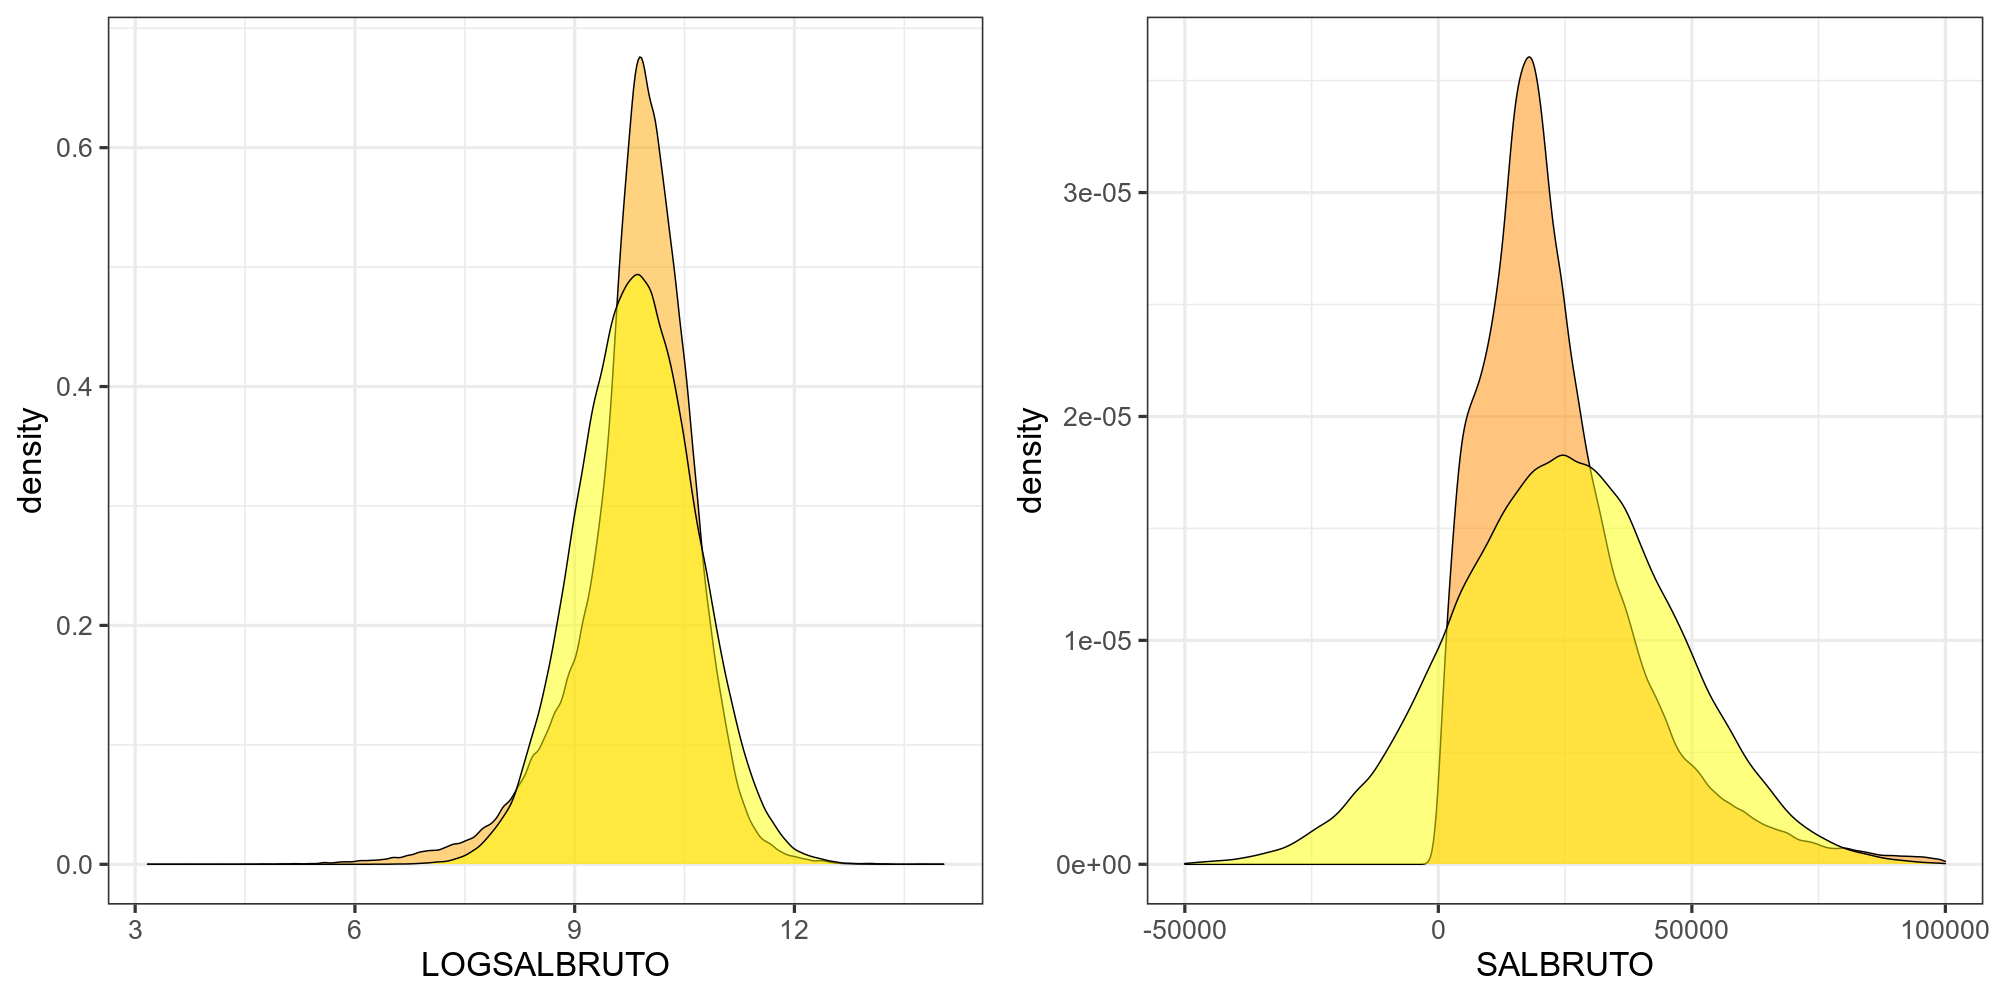

In [27]:
# create a normal ditribution with mean and sd equal to the log(SALBRUTO)
mean_log_salbruto <- mean(log(salary$SALBRUTO))
sd_log_salbruto <- sd(log(salary$SALBRUTO))
norm_log_salbruto <- rnorm(length(salary$SALBRUTO), mean_log_salbruto, sd_log_salbruto) 

# create a normal ditribution with mean and sd equal to the natural SALBRUTO
mean_nat_salbruto <- mean(salary$SALBRUTO)
sd_nat_salbruto <- sd(salary$SALBRUTO)
norm_nat_salbruto <- rnorm(length(salary$SALBRUTO), mean_nat_salbruto, sd_nat_salbruto) 

# create two dataframes to plot the SALBRUTOs againt their related normal distribution
df_log <- data.frame(LOGSALBRUTO = log(salary$SALBRUTO), NORM = norm_log_salbruto)
df_nat <- data.frame(SALBRUTO = salary$SALBRUTO, NORM = norm_nat_salbruto)

p1 <- ggplot(df_log) + 
        geom_density(aes(LOGSALBRUTO), fill="orange", alpha=0.5) + 
        geom_density(aes(NORM), fill="yellow", alpha=0.5) 

p2 <- ggplot(df_nat) + 
        geom_density(aes(SALBRUTO), fill="darkorange", alpha=0.5) + 
        geom_density(aes(NORM), fill="yellow", alpha=0.5) + xlim(c(-50000, 100000))

grid.arrange(p1, p2, nrow=1)

# RESUMEN: Los datos no están normalizados y por lo tanto no son comparables entre ellos.
